# Keras Sequential API

## Classify images of clothing

In this notebook, we will train a neural network to classify images of clothing from the Fashion MNIST dataset. The notebook is based on the public tutorial found here: https://www.tensorflow.org/tutorials/keras/classification

##### Import the required modules

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2021-12-22 12:06:20.216423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-22 12:06:20.216446: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


##### Download the Fashion MNIST Dataset
We will use the `keras.datasets` package, which contains utility functions to download popular datasets with a few lines of code, without worrying about whether you are downloading from the correct source, or the correct version, etc.

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

The downloaded data will be stored on your disk in a hidden folder (e.g. `/Users/<username>/.keras/datasets/fashion-mnist` on MacOs. 

The variables `train_images` and `test_images` are numpy arrays of shape $(n_{images}, 28, 28)$, whereas `train_labels`, and `test_labels` are numpy arrays of size $(n_{images}, )$

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[:10])

(60000, 28, 28)
(60000,)
[9 0 0 3 0 2 7 2 5 5]


Each label is an integer in 0..9. Let us define the corresponding class names (they are not defined in the dataset)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Finally, let us plot the first training image as an example.

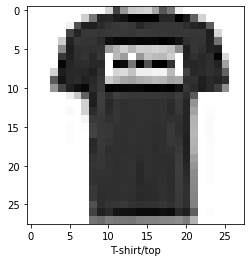

In [5]:
plt.figure()
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[1]])
plt.grid(False)
plt.show()

##### Let us build our first Keras model, with the Sequential API

For this example, we will use a simple two-layer, fully-connected neural network. 

The network includes two types layer (sublcasses of `keras.layers.Layer`):

- `Dense` layers (i.e. fully connected ones) take as mandatory parameters the number of output units. Optional parameters include the activation function, the presence of bias, etc.
- `Flatten` layers are used to flatten a rank-N tensor (2 in this case) to a 1D array. Their input parameter is the shape of the input tensor.

The `Flatten` layer is needed to feed the following `Dense` layers, which only accept (batches of) rank-1 tensors.

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', name='first_dense'),
    keras.layers.Dense(10, activation='softmax', name='second_dense')
])

2021-12-22 12:06:22.600624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-22 12:06:22.600650: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-22 12:06:22.600667: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (matteo-Inspiron-7591-2n1): /proc/driver/nvidia/version does not exist
2021-12-22 12:06:22.600817: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let us show a summary of the model and plot it. Notice that the `Flatten` layer does not have trainable parameters. Also notice the `?`/`None` dimensions in the various layers. These mean that the layer can accept any value for that dimension (the batch size in this case).

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 first_dense (Dense)         (None, 128)               100480    
                                                                 
 second_dense (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
keras.utils.plot_model(model, 'tmp_new.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


##### Compile the model

Let us now compile the model, specifying optimizer, loss function and metrics.

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

##### Train the model

Let us now train the model. Remember that `np.ndarray` are automatically converted to TF tensors, so we don't need to do that explicitly when passing data to `fit()`

In [10]:
model.fit(train_images, train_labels, batch_size=32, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 998us/step - loss: 2.9164 - accuracy: 0.6815
Epoch 2/100
1875/1875 [==============================] - 2s 940us/step - loss: 0.7124 - accuracy: 0.7305
Epoch 3/100
1875/1875 [==============================] - 2s 875us/step - loss: 0.6297 - accuracy: 0.7726
Epoch 4/100
1875/1875 [==============================] - 2s 872us/step - loss: 0.5878 - accuracy: 0.7924
Epoch 5/100
1875/1875 [==============================] - 2s 885us/step - loss: 0.5670 - accuracy: 0.8042
Epoch 6/100
1875/1875 [==============================] - 2s 882us/step - loss: 0.5316 - accuracy: 0.8163
Epoch 7/100
1875/1875 [==============================] - 2s 874us/step - loss: 0.5291 - accuracy: 0.8180
Epoch 8/100
1875/1875 [==============================] - 2s 936us/step - loss: 0.5202 - accuracy: 0.8223
Epoch 9/100
1875/1875 [==============================] - 2s 951us/step - loss: 0.5090 - accuracy: 0.8253
Epoch 10/100
1875/1875 [==============================]

1875/1875 [==============================] - 2s 919us/step - loss: 0.4425 - accuracy: 0.8488
Epoch 79/100
1875/1875 [==============================] - 2s 921us/step - loss: 0.4395 - accuracy: 0.8463
Epoch 80/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4524 - accuracy: 0.8496
Epoch 81/100
1875/1875 [==============================] - 2s 902us/step - loss: 0.4470 - accuracy: 0.8497
Epoch 82/100
1875/1875 [==============================] - 2s 866us/step - loss: 0.4432 - accuracy: 0.8477
Epoch 83/100
1875/1875 [==============================] - 2s 959us/step - loss: 0.4458 - accuracy: 0.8515
Epoch 84/100
1875/1875 [==============================] - 2s 957us/step - loss: 0.4467 - accuracy: 0.8486
Epoch 85/100
1875/1875 [==============================] - 2s 908us/step - loss: 0.4371 - accuracy: 0.8487
Epoch 86/100
1875/1875 [==============================] - 2s 822us/step - loss: 0.4410 - accuracy: 0.8486
Epoch 87/100
1875/1875 [==============================] - 2s 

##### Evaluate on unseen data

Let us test the model on unseen data using the `evaluate()` method.

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8216000199317932


##### Perform a prediction on a single image

Let us run a prediction on one image and see the result.

Predicted label: 7 (Sneaker)
Real label: 7 (Sneaker)


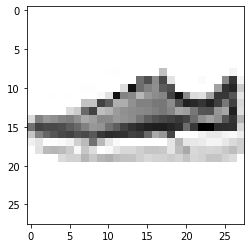

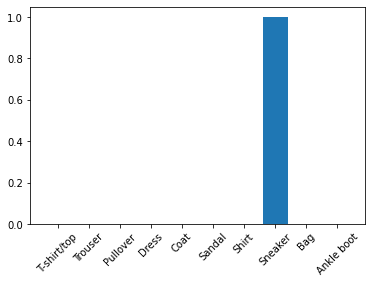

In [12]:
idx = 9

pred = model.predict(test_images[idx].reshape(1, 28, 28))
pred_lidx = tf.argmax(pred[0])
pred_label = class_names[pred_lidx]

print("Predicted label: {} ({})".format(pred_lidx, pred_label))
print("Real label: {} ({})".format(test_labels[idx], class_names[test_labels[idx]]))

plt.figure()
plt.imshow(test_images[idx], cmap=plt.cm.binary)
plt.grid(False)
plt.figure()
plt.bar(range(len(class_names)), pred[0], tick_label=class_names)
plt.xticks(rotation=45)
plt.show()